In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Lecture 04")
img_file_name = "GFP_06-DAPI.tif"
print("... reading image from file: " + img_file_name)

Lecture 04
... reading image from file: GFP_06-DAPI.tif


In [3]:
# Cast image to float32
itkImage = sitk.ReadImage(img_file_name)
itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)

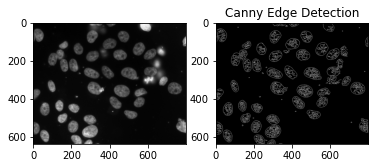

(634, 800) 1.0 0.0


In [4]:
# Apply the Canny Edge Detector
# https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1CannyEdgeDetectionImageFilter.html
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 0.0)
# Parameter 4: the smoothing parameter as a vector (default set to (3, 0.0)    

img_ce = sitk.CannyEdgeDetection(itkImage, 0.0, 3.0, (3, 0.0)) 
#img_ce = sitk.CannyEdgeDetection(itkImage, 5.0, 5.0)

plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(img_ce), cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

img_arr = sitk.GetArrayFromImage(img_ce)
print(img_arr.shape, img_arr.max(), img_arr.min())

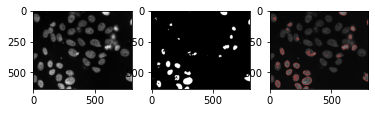

In [5]:
''' 
Exercise code block
'''

itkImage = sitk.Cast(itkImage, sitk.sitkFloat32)

# 1. Identify a good smoothing parameter and show the smoothed image
smoothed_image = sitk.SmoothingRecursiveGaussian(itkImage, 3.0)

# Binary Threshold: http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1BinaryThresholdImageFilter.html
# Paramter 1: the input image
# Parameter 2: the lower threshold (default set to 0.0)
# Parameter 3: the upper threshold (default set to 255.0)
# Parameter 5: inside value    
# Parameter 6: outside value
# Note: Input Image Type is float and output is unsigned char (8 bits)

# 2.1 Apply Otsu's method to automatically determine the threshold below
# 2.2 Manually tune the threshold below and show the thresholding results
threshold = 64
img_Binary = sitk.BinaryThreshold(smoothed_image, 0, threshold, 0, 255)

img_float32 = sitk.Cast(img_Binary, sitk.sitkFloat32)
# 3. Tune the parameters in Canny edge detector and show the edge detection results
img_ce = sitk.CannyEdgeDetection(img_float32)

# 4. Tune the parameters in steps 1-3 to have all the cell boundaries shown in red
arr_img = sitk.GetArrayFromImage(itkImage)
arr_binary = sitk.GetArrayFromImage(img_Binary)
arr_edge = sitk.GetArrayFromImage(img_ce)

arr_red = sitk.GetArrayFromImage(itkImage)
arr_red[arr_edge>0] = 255

h, w = arr_img.shape
arr_rgb = np.zeros((h,w,3), 'uint8')
arr_rgb[..., 0] = arr_red
arr_rgb[..., 1] = arr_img
arr_rgb[..., 2] = arr_img

plt.subplot(1, 3, 1)
plt.imshow(sitk.GetArrayFromImage(itkImage), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(arr_binary, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(arr_rgb, cmap='gray')
plt.show()